# Motion fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from lib.folder import FolderMg

In [2]:
dataPath = "algo_data"
dataMg = FolderMg(dataPath)
dataMg.ls()


Current Folder 'algo_data' contains 1 folders, which are:
  - .ipynb_checkpoints
  - ...

Current Folder 'algo_data' contains 4 files, which are:
  - 202308011345.csv
  - 202308011641.csv
  - 202308011646.csv
  - 202308011653.csv
  - ...


In [3]:
file = dataMg.files[1]
print(file.name)

202308011641.csv


In [4]:
df = pd.read_csv(file,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.690879e+09,0.999976,0.006894,0.0,-0.794301,-0.006894,0.999976,0.0,-43.645759,0.0,...,0.0,0.0,0.0,1.0,1409.942840,3808.608773,1.540282,-1409.762601,0.119934,0.992782
1,1.690879e+09,0.999998,0.001854,0.0,2.420754,-0.001854,0.999998,0.0,-37.386952,0.0,...,0.0,0.0,0.0,1.0,2.626158,3.543800,1.385843,-0.154228,0.120239,0.992745
2,1.690879e+09,0.999971,0.007599,0.0,-3.589678,-0.007599,0.999971,0.0,-15.645663,0.0,...,0.0,0.0,0.0,1.0,-2.636025,3.534840,-1.832958,-0.168174,0.120755,0.992682
3,1.690879e+09,1.000000,0.000771,0.0,1.096952,-0.000771,1.000000,0.0,-4.872257,0.0,...,0.0,0.0,0.0,1.0,2.588479,3.539637,1.347283,-0.143983,0.119198,0.992871
4,1.690879e+09,0.999990,0.004409,0.0,-2.649091,-0.004409,0.999990,0.0,0.481237,0.0,...,0.0,0.0,0.0,1.0,-2.598067,3.539576,4.488088,-0.148877,0.119481,0.992836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.690879e+09,0.999996,0.002936,0.0,1.112342,-0.002936,0.999996,0.0,-33.502026,0.0,...,0.0,0.0,0.0,1.0,0.633168,3.144646,0.457769,0.125390,0.120362,0.992730
70,1.690879e+09,0.999997,0.002245,0.0,2.607767,-0.002245,0.999997,0.0,-44.126503,0.0,...,0.0,0.0,0.0,1.0,-2.743803,3.535942,-1.845817,0.126307,0.122483,0.992471
71,1.690879e+09,0.999980,0.006357,0.0,-0.546742,-0.006357,0.999980,0.0,-43.167142,0.0,...,0.0,0.0,0.0,1.0,2.697059,3.533139,7.520489,0.088312,0.120843,0.992672
72,1.690879e+09,0.999995,0.003165,0.0,1.103829,-0.003165,0.999995,0.0,-34.819997,0.0,...,0.0,0.0,0.0,1.0,-2.685839,3.534572,4.419622,0.097748,0.120298,0.992738


In [5]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [6]:
pos_collection = []
for index, row in df.iterrows():
    transform_matrix = row[1:17]
    pos = np.array([transform_matrix[4],transform_matrix[8],transform_matrix[12]])
    pos_collection.append(pos)
pos_collection = np.array(pos_collection)
print(pos_collection.shape)


(74, 3)


In [7]:
timestamp= df[[0]].to_numpy().squeeze()
print(timestamp.shape)

(74,)


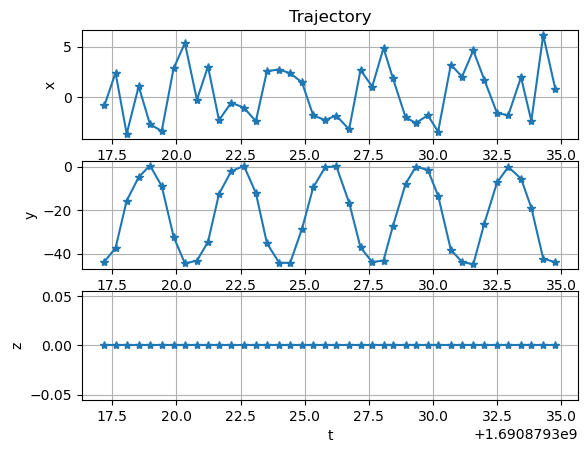

In [8]:
T = 40
trajectory = pos_collection[:T]
t = timestamp[:T]


fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, trajectory[:, 1], "*-")
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()

In [9]:
def fun(x,A,w,phi,B):
    return A*np.sin(w*t+phi)+B

In [10]:
y = trajectory[:,1]

[0 5]
0.4505296059143849


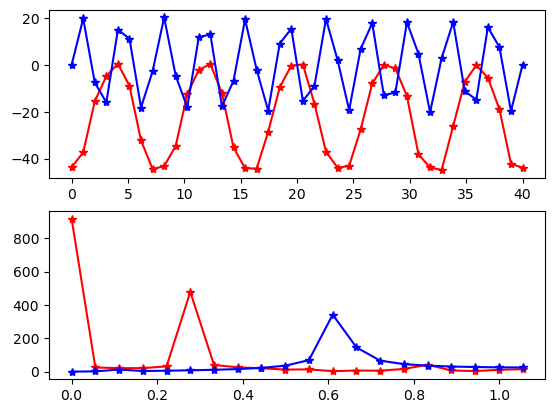

In [11]:
X=y
N = len(y)

# Compute the FFT
yf = scipy.fftpack.fft(y)
idx = np.where(np.abs(yf[:N//2])>200)[0]
print(idx)

x = np.linspace(0,N,N)
z = 20*np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
zf = scipy.fftpack.fft(z)

# frequency
dt = np.diff(t).mean()
print(dt)
freq = np.fft.fftfreq(N, d=dt)

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(x,y,'r*-')
ax.plot(x,z,'b*-')
ax = fig.add_subplot(212)
ax.plot(freq[:N//2],abs(yf[:N//2]),'r*-')
ax.plot(freq[:N//2],abs(zf[:N//2]),'b*-')
plt.show()

In [12]:
guess_freq = freq[idx[-1]]

In [13]:
guess_A = (y.max()-y.min())/2
guess_B = y.mean()
guess_w = guess_freq
guess_phi = 0
guess = [guess_A,guess_w,guess_phi,guess_B]
print(guess)
popt, pcov = curve_fit(fun, t, y,guess)
print(np.linalg.cond(pcov),np.diag(pcov))

[22.687909331441517, 0.2774512448439493, 0, -22.887259464228315]
inf [inf inf inf inf]


C:\Users\weike\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


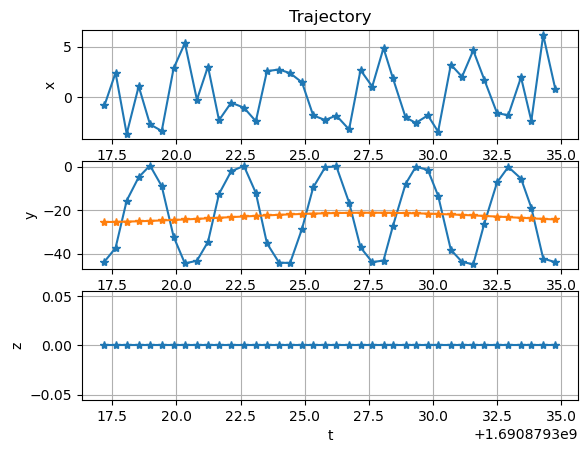

In [14]:
fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, trajectory[:, 1], "*-")
ax.plot(t, fun(t, popt[0],popt[1],popt[2],popt[3]),'*-')
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()

# Kalman Filter

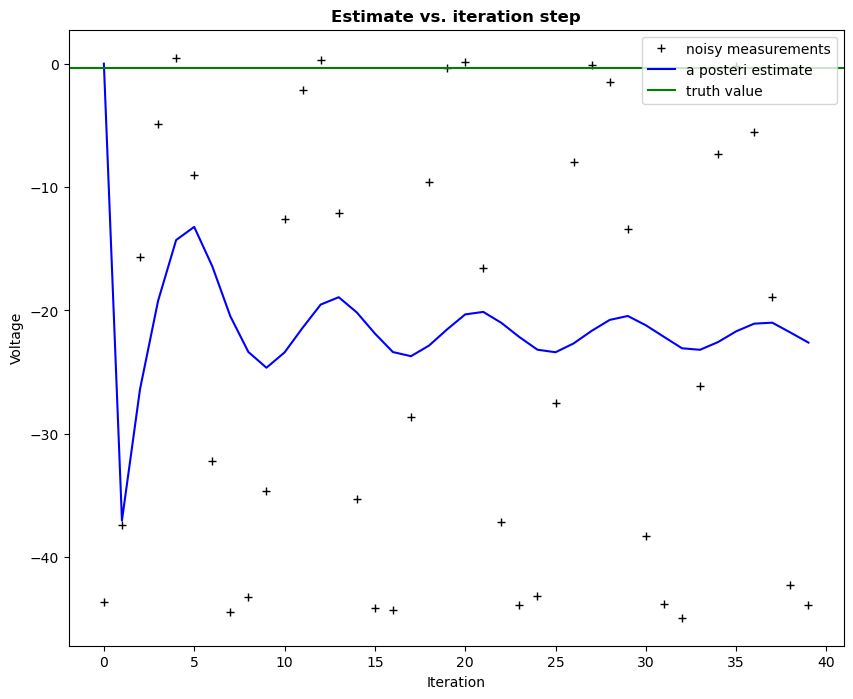

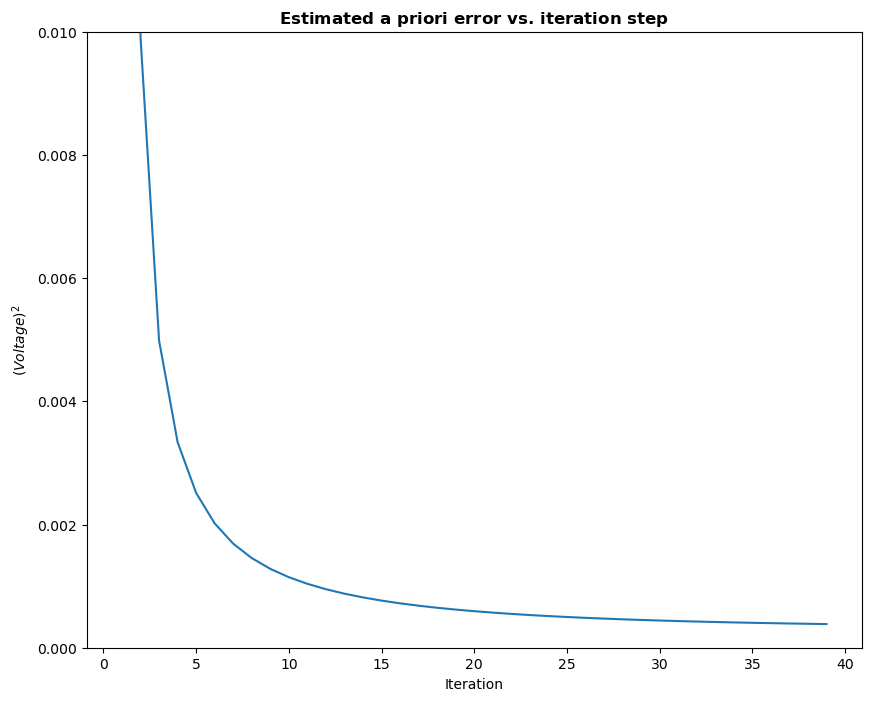

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = y
sz = z.size
n_iter = len(y)
Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

In [16]:
from pykalman import KalmanFilter
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
observations = y

In [17]:
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

fitted model: <pykalman.standard.KalmanFilter object at 0x0000012D1D995090>


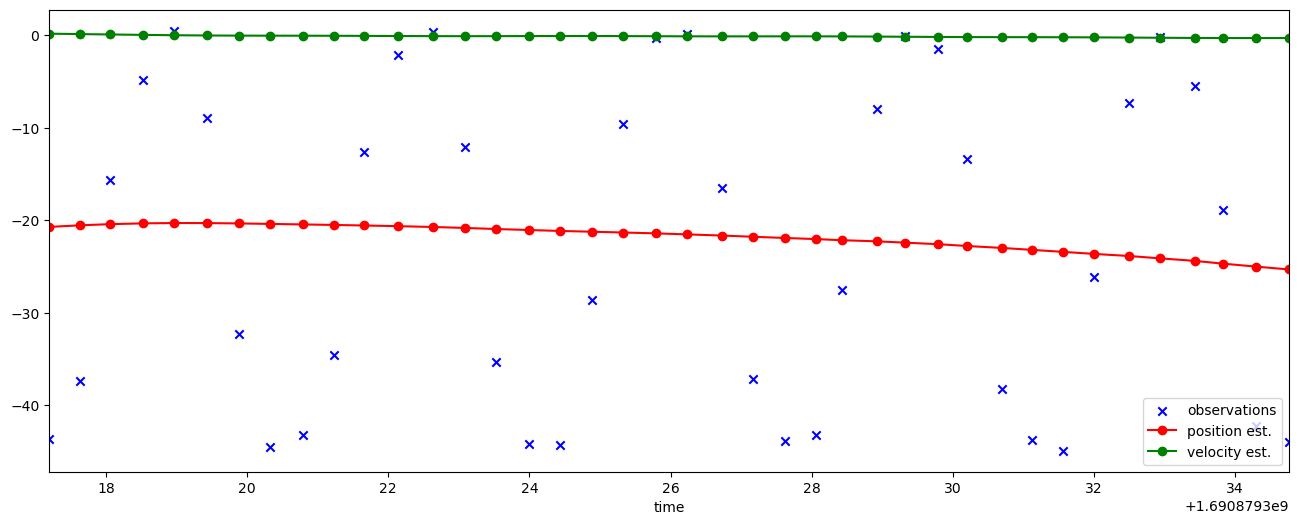

In [22]:
plt.figure(figsize=(16, 6))
obs_scatter = plt.scatter(t, observations, marker='x', color='b',
                         label='observations')
position_line = plt.plot(t, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = plt.plot(t, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
plt.legend(loc='lower right')
plt.xlim(xmin=t.min(), xmax=t.max())
plt.xlabel('time')
plt.show()